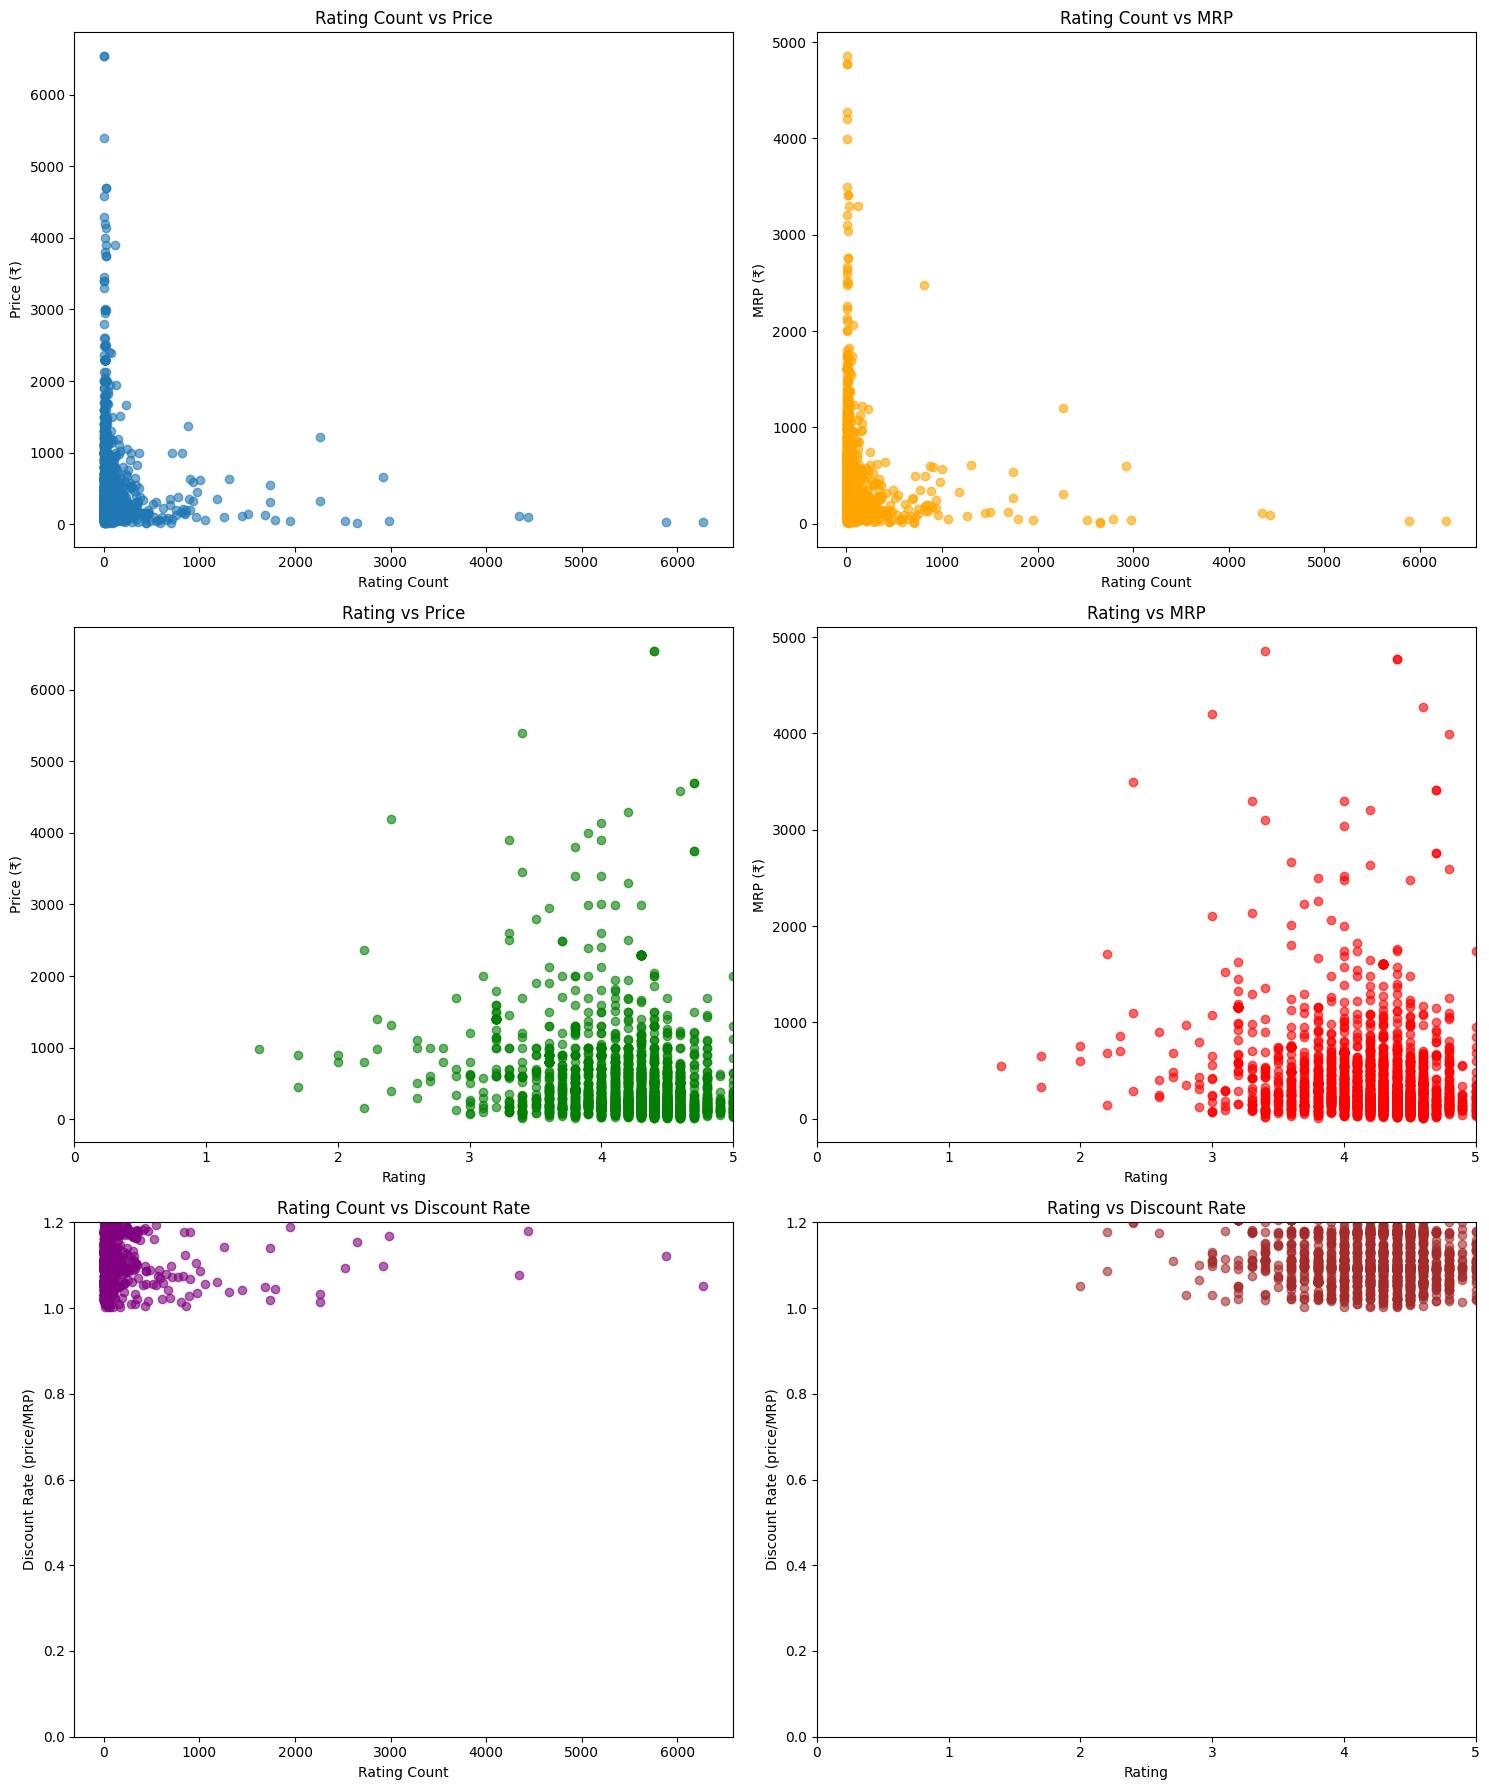

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

def parse_currency(value):
    """Helper function to parse currency values with various prefixes"""
    try:
        numeric_str = re.sub(r'[^\d.]', '', str(value))
        return float(numeric_str)
    except:
        return np.nan

# Read CSV file
df = pd.read_csv('1mgData.csv')  # Update with your filename

# Process rating_count column
df['rating_count_num'] = df['rating_count'].apply(
    lambda x: float(x.split()[0]) if x != 'No reviews' else np.nan
)

# Process price and mrp columns
df['price_num'] = df['price'].apply(
    lambda x: parse_currency(x) if x != 'No discounts' else np.nan
)
df['mrp_num'] = df['mrp'].apply(parse_currency)

# Calculate discount rate (price/mrp)
df['discount_rate'] = df.apply(
    lambda row: row['price_num'] / row['mrp_num']
    if (pd.notnull(row['price_num']) and
        pd.notnull(row['mrp_num']) and
        row['mrp_num'] != 0)
    else np.nan,
    axis=1
)

# Convert rating to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Create filtered datasets
data_rc_p = df.dropna(subset=['rating_count_num', 'price_num'])
data_rc_mrp = df.dropna(subset=['rating_count_num', 'mrp_num'])
data_r_p = df.dropna(subset=['rating', 'price_num'])
data_r_mrp = df.dropna(subset=['rating', 'mrp_num'])
data_rc_dr = df.dropna(subset=['rating_count_num', 'discount_rate'])
data_r_dr = df.dropna(subset=['rating', 'discount_rate'])

# Create figure with 3x2 subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# Plot 1: Rating Count vs Price
axs[0, 0].scatter(data_rc_p['rating_count_num'], data_rc_p['price_num'], alpha=0.6)
axs[0, 0].set_title('Rating Count vs Price')
axs[0, 0].set_xlabel('Rating Count')
axs[0, 0].set_ylabel('Price (₹)')

# Plot 2: Rating Count vs MRP
axs[0, 1].scatter(data_rc_mrp['rating_count_num'], data_rc_mrp['mrp_num'], alpha=0.6, color='orange')
axs[0, 1].set_title('Rating Count vs MRP')
axs[0, 1].set_xlabel('Rating Count')
axs[0, 1].set_ylabel('MRP (₹)')

# Plot 3: Rating vs Price
axs[1, 0].scatter(data_r_p['rating'], data_r_p['price_num'], alpha=0.6, color='green')
axs[1, 0].set_title('Rating vs Price')
axs[1, 0].set_xlabel('Rating')
axs[1, 0].set_ylabel('Price (₹)')
axs[1, 0].set_xlim(0, 5)

# Plot 4: Rating vs MRP
axs[1, 1].scatter(data_r_mrp['rating'], data_r_mrp['mrp_num'], alpha=0.6, color='red')
axs[1, 1].set_title('Rating vs MRP')
axs[1, 1].set_xlabel('Rating')
axs[1, 1].set_ylabel('MRP (₹)')
axs[1, 1].set_xlim(0, 5)

# Plot 5: Rating Count vs Discount Rate
axs[2, 0].scatter(data_rc_dr['rating_count_num'], data_rc_dr['discount_rate'], alpha=0.6, color='purple')
axs[2, 0].set_title('Rating Count vs Discount Rate')
axs[2, 0].set_xlabel('Rating Count')
axs[2, 0].set_ylabel('Discount Rate (price/MRP)')
axs[2, 0].set_ylim(0, 1.2)  # Allow for potential slight overpricing

# Plot 6: Rating vs Discount Rate
axs[2, 1].scatter(data_r_dr['rating'], data_r_dr['discount_rate'], alpha=0.6, color='brown')
axs[2, 1].set_title('Rating vs Discount Rate')
axs[2, 1].set_xlabel('Rating')
axs[2, 1].set_ylabel('Discount Rate (price/MRP)')
axs[2, 1].set_xlim(0, 5)
axs[2, 1].set_ylim(0, 1.2)

# Adjust layout and show plots
plt.tight_layout()
plt.show()